In [74]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from numpy.random import default_rng


import nltk
import spacy
import nltk.corpus
import en_core_web_sm

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix

nlp = spacy.load("en_core_web_sm")

import string

In [75]:
df = pd.read_excel(r"PATH\full_raw_data.xlsx")

In [76]:
df.head()

,0,1,2,3,productName,productCategory,productPrice,productURL
0,10.0,Buy and don't argue,['very nice screen'. 'Super fast'. 'Battery fi...,Transition from the Samsung S9 to S21 FE is gi...,Samsung Galaxy S21 FE 128GB Gray 5G + Samsung ...,en/mobile-phones,662.99,https://www.coolblue.nl/en/product/898391/sams...
1,9.7,Very nice device,['Clear image quality'. 'Very good camera'. '5...,Good price quality! Fast device. very fine S s...,Samsung Galaxy S21 FE 128GB Gray 5G + Samsung ...,en/mobile-phones,662.99,https://www.coolblue.nl/en/product/898391/sams...
2,9.3,from S6 to S21 FE. an easy transition,['2'. '0'],once Samsung. always Samsung,Samsung Galaxy S21 FE 128GB Gray 5G + Samsung ...,en/mobile-phones,662.99,https://www.coolblue.nl/en/product/898391/sams...
3,10.0,Top smart phone!,['Fast. smooth-functioning smartphone'. 'Nice ...,I have been a user of Samsung phones for many ...,Samsung Galaxy S21 FE 128GB Gray 5G + Samsung ...,en/mobile-phones,662.99,https://www.coolblue.nl/en/product/898391/sams...
4,9.0,Nice phone. good camera. acceptable battery,['fast phone'. 'Beautiful photos and videos'. ...,Nice phone that takes good quality videos and ...,Samsung Galaxy S21 FE 128GB Gray 5G + Samsung ...,en/mobile-phones,662.99,https://www.coolblue.nl/en/product/898391/sams...


In [77]:
df.dtypes

0                  float64
1                   object
2                   object
3                   object
productName         object
productCategory     object
productPrice       float64
productURL          object
dtype: object

In [78]:
df.duplicated().sum()

3213

In [79]:
df.isna().sum()

0                  0
1                  0
2                  0
3                  0
productName        0
productCategory    0
productPrice       0
productURL         0
dtype: int64

In [80]:
df = df.drop_duplicates()
df = df.drop_duplicates(subset=['0', '1', '3'], keep='first')
df = df[df['1'] != 'expert review']

In [81]:
df.shape

(11175, 8)

In [82]:
df = df.astype({"0": float, "1": str, "3": str, "productName":str, "productCategory": str, "productPrice":float, "productURL":str})

In [83]:
df = df.rename(columns={"0": 'productRating', "1": 'reviewTitle', "2": 'reviewProCon', "3":'reviewText'})

In [84]:
df.productCategory.unique()

array(['en/mobile-phones', 'en/laptops-desktops-monitors',
       'en/televisions-projectors', 'en/sports-watches', 'en/headphones',
       'en/washing-machines', 'en/large-kitchen-appliances'], dtype=object)

In [85]:
df.nunique()

productRating         43
reviewTitle         8299
reviewProCon        8823
reviewText         10727
productName          284
productCategory        7
productPrice         153
productURL           284
dtype: int64

In [86]:
check = df[df.duplicated(subset=['reviewText'],keep=False)]
check[check.reviewTitle == 'Good']

,productRating,reviewTitle,reviewProCon,reviewText,productName,productCategory,productPrice,productURL
81,10.0,Good,['0'. '0'],Meets my expectations,Samsung Galaxy A52s 128GB Black 5G,en/mobile-phones,349.00,https://www.coolblue.nl/en/product/889081/sams...
4209,10.0,Good,['Collapsible so easy to take with you'. 'Smal...,Good,Veripart VPLS101 Laptop Stand,en/laptops-desktops-monitors,31.00,https://www.coolblue.nl/en/product/871754/veri...
7468,8.4,Good,['Sharp image'. 'Price quality'. 'Chromecast b...,Good,Samsung Crystal UHD 43TU7020 (2020),en/televisions-projectors,489.00,https://www.coolblue.nl/en/product/868633/sams...
13779,8.0,Good,"['Large capacity', 'Shorter time possible', 'd...",Good,LG GC3V309N4,en/washing-machines,499.00,https://www.coolblue.nl/en/product/873088/lg-g...
16517,8.0,Good,"['0', '0']",Good price quality ratio,AEG L7FE794CBS ProSteam,en/washing-machines,799.00,https://www.coolblue.nl/en/product/889437/aeg-...
20435,8.0,Good,"['Everything you need together', '0', '0']",Easy to connect,Scanpart Gas hose Rubber 100cm,en/large-kitchen-appliances,26.99,https://www.coolblue.nl/en/product/503174/scan...


In [87]:
df.productName.unique()

array(['Samsung Galaxy S21 FE 128GB Gray 5G + Samsung Clear View Book Case Black',
       'Apple iPhone SE 3 128GB Black',
       'Samsung Galaxy A52s 128GB Black 5G',
       'Apple iPhone 13 128GB Green',
       'Samsung Galaxy S22 Ultra 256GB Black 5G + Accessory Pack',
       'Apple iPhone 13 Pro 128GB Green',
       'Apple iPhone 13 Mini 256GB Black',
       'OnePlus 9 Pro 128GB Silver 5G',
       'Samsung Galaxy A53 128GB Black 5G + S View Book Case Black',
       'Samsung Galaxy A13 64GB Black',
       'Apple iPhone 12 128GB Black + Apple USB-C Charger 20W',
       'Xiaomi 11T 256GB Gray 5G', 'OnePlus 9 128GB Black 5G',
       'OnePlus 10 Pro 256GB Black 5G', 'OnePlus Nord 2 256GB Gray 5G',
       'Samsung Galaxy S20 FE 128GB Blue 5G + Samsung Book Case Blue',
       'Samsung Galaxy Xcover 5 64GB Black',
       'Apple iPhone 11 128GB Black + Apple USB-C Charger 20W',
       'Apple iPhone 12 Mini 128GB Black + Apple USB-C Charger 20W',
       'OnePlus 9 Pro 256GB Black 5G',
      

In [88]:
df.productRating[df.productRating <= 7].value_counts().sum()

397

In [89]:
df_distribution = df.productRating.value_counts().reset_index()
df_distribution.columns = ['rating', 'frequency']
fig = px.histogram(df_distribution, x="rating", y="frequency", nbins=110)
fig.show()

In [90]:
df.productCategory = df.productCategory.replace({'en/mobile-phones': 'phones', 
                                                 'en/laptops-desktops-monitors':'computer', 
                                                 'en/televisions-projectors': 'television', 
                                                 'en/sports-watches':'sportwatch', 
                                                 'en/headphones':'headphones', 
                                                 'en/washing-machines':'washingmachines',
                                                 'en/large-kitchen-appliances':'kitchenappliances'})

In [91]:
df_distr = df.productCategory.value_counts().reset_index().rename(columns={'0':'category','productCategory': 'frequency' })
df.productCategory.value_counts()

washingmachines      2869
kitchenappliances    2184
television           1988
computer             1453
phones               1143
sportwatch            786
headphones            752
Name: productCategory, dtype: int64

In [92]:
fig = px.histogram(df_distr, x="index", y="frequency", nbins=4)
fig.show()

In [93]:
columns_all = ['rating', 'frequency']

df_phones = df[df.productCategory == 'phones']
df_computer = df[df.productCategory == 'computer']
df_television = df[df.productCategory == 'television']
df_sportwatch = df[df.productCategory == 'sportwatch']
df_headphones = df[df.productCategory == 'headphones']
df_washingmachines = df[df.productCategory == 'washingmachines']
df_kitchenappliances = df[df.productCategory == 'kitchenappliances']

df_phones_distr = df_phones.productRating.value_counts().reset_index()
df_phones_distr.columns = columns_all

df_computer_distr = df_computer.productRating.value_counts().reset_index()
df_computer_distr.columns = columns_all

df_television_distr = df_television.productRating.value_counts().reset_index()
df_television_distr.columns = columns_all

df_sportwatch_distr = df_sportwatch.productRating.value_counts().reset_index()
df_sportwatch_distr.columns = columns_all

df_headphones_distr = df_headphones.productRating.value_counts().reset_index()
df_headphones_distr.columns = columns_all

df_washingmachines_distr = df_washingmachines.productRating.value_counts().reset_index()
df_washingmachines_distr.columns = columns_all

df_kitchenappliances_distr = df_kitchenappliances.productRating.value_counts().reset_index()
df_kitchenappliances_distr.columns = columns_all

In [94]:
# fig = make_subplots(rows=3, cols=4, start_cell="bottom-left", subplot_titles=('phones', 'computers', 'television', 'sportwatches'))

# fig.add_trace(go.Bar(x=df_phones_distr.rating, y=df_phones_distr.frequency),
#               row=1, col=1)

# fig.add_trace(go.Bar(x=df_computer_distr.rating, y=df_computer_distr.frequency),
#               row=1, col=2)

# fig.add_trace(go.Bar(x=df_television_distr.rating, y=df_television_distr.frequency),
#               row=2, col=1)

# fig.add_trace(go.Bar(x=df_sportwatch_distr.rating, y=df_sportwatch_distr.frequency),
#               row=2, col=2)

# fig.add_trace(go.Bar(x=df_headphones_distr.rating, y=df_headphones_distr.frequency),
#               row=1, col=3)

# fig.add_trace(go.Bar(x=df_washingmachines_distr.rating, y=df_washingmachines_distr.frequency),
#               row=2, col=3)

# fig.add_trace(go.Bar(x=df_kitchenappliances_distr.rating, y=df_kitchenappliances_distr.frequency),
#               row=1, col=4)

# fig.update_yaxes(range = [0,2000])
# fig.update_xaxes(range = [0,10])

# fig.show()

In [95]:
fig = px.box(df, y="productRating", 
                color="productCategory", 
             title="Distribution of the product ratings per product category")
fig.show()

In [96]:
df.productName.unique()

array(['Samsung Galaxy S21 FE 128GB Gray 5G + Samsung Clear View Book Case Black',
       'Apple iPhone SE 3 128GB Black',
       'Samsung Galaxy A52s 128GB Black 5G',
       'Apple iPhone 13 128GB Green',
       'Samsung Galaxy S22 Ultra 256GB Black 5G + Accessory Pack',
       'Apple iPhone 13 Pro 128GB Green',
       'Apple iPhone 13 Mini 256GB Black',
       'OnePlus 9 Pro 128GB Silver 5G',
       'Samsung Galaxy A53 128GB Black 5G + S View Book Case Black',
       'Samsung Galaxy A13 64GB Black',
       'Apple iPhone 12 128GB Black + Apple USB-C Charger 20W',
       'Xiaomi 11T 256GB Gray 5G', 'OnePlus 9 128GB Black 5G',
       'OnePlus 10 Pro 256GB Black 5G', 'OnePlus Nord 2 256GB Gray 5G',
       'Samsung Galaxy S20 FE 128GB Blue 5G + Samsung Book Case Blue',
       'Samsung Galaxy Xcover 5 64GB Black',
       'Apple iPhone 11 128GB Black + Apple USB-C Charger 20W',
       'Apple iPhone 12 Mini 128GB Black + Apple USB-C Charger 20W',
       'OnePlus 9 Pro 256GB Black 5G',
      

In [100]:
#get the product brand from the product name and add the title with review in order to enrich text
df[['productBrand','productName']] = df.productName.str.split(' ', 1, expand=True)
df['reviewTextandTitle'] = df.reviewTitle + ' ' + df.reviewText

In [101]:
df.productBrand.nunique()

46

In [119]:
df.productBrand.value_counts()

Samsung      3496
Apple        1205
AEG           754
LG            555
ETNA          539
Bosch         488
Haier         471
Siemens       448
Sony          357
Whirlpool     323
OnePlus       270
Miele         235
Philips       223
Lenovo        175
JBL           149
Liebherr      143
AOC           140
Veripart      140
HP            123
ATAG          107
Bose           88
Scanpart       82
Fresh          70
Beats          70
iiyama         60
Neomounts      50
Acer           50
Hoover         46
Twelve         40
Name: productBrand, dtype: int64

In [103]:
for brand in df.productBrand.unique():
    test = int(df.productBrand[df.productBrand == brand].value_counts())
    if test <= 30:
        df = df[(df.productBrand != brand)]

In [104]:
df[df.productBrand == 'Samsung'].describe()

,productRating,productPrice
count,3496.000000,3496.000000
mean,8.946711,548.829671
std,1.032319,289.079487
min,2.000000,169.000000
25%,8.400000,304.000000
50%,9.200000,489.000000
75%,10.000000,699.000000
max,10.000000,1749.000000


In [105]:
df[df.productRating < 5].count()

productRating         56
reviewTitle           56
reviewProCon          56
reviewText            56
productName           56
productCategory       56
productPrice          56
productURL            56
productBrand          56
reviewTextandTitle    56
dtype: int64

In [106]:
df.groupby(['productBrand']).mean()

,productRating,productPrice
productBrand,,
AEG,8.962997,664.536479
AOC,9.115714,269.000000
ATAG,8.960748,1090.588785
Acer,9.240000,673.000000
Apple,9.305726,1167.501087
Beats,9.337143,329.000000
Bosch,9.208811,616.660004
Bose,9.209091,294.681818
ETNA,8.901670,481.968460


In [107]:
df.describe()

,productRating,productPrice
count,10897.000000,10897.000000
mean,9.043434,644.908242
std,1.002610,455.383808
min,0.000000,1.009000
25%,8.400000,399.000000
50%,9.200000,505.490000
75%,10.000000,849.000000
max,10.000000,4559.000000


In [108]:
fig = px.box(df, y="productRating", 
                color="productBrand", 
             title="Distribution of the product ratings per brand")
fig.show()

In [109]:
df.productRating = round(df.productRating)

In [110]:
df_low_scores = df[(df.productRating <= 7)]
df_high_scores = df[(df.productRating > 9)]
df_samsung = df[(df.productBrand == 'Samsung')]
df_liebherr = df[df.productBrand == 'Liebherr']
df_aeg = df[df.productBrand == 'AEG']
df_hp = df[df.productBrand == 'HP']
df_miele = df[df.productBrand == 'Miele']

In [111]:
df_low_scores.shape

(574, 10)

In [112]:
df_high_scores.shape

(4772, 10)

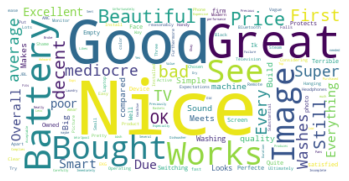

In [113]:
text = " ".join(cat.split()[0] for cat in df_low_scores.reviewText)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
test = WordCloud().process_text(text)
sort_orders = sorted(test.items(), key=lambda x: x[1], reverse=True)
sorted_words_df = dict(sort_orders)
sorted_words_df = pd.DataFrame.from_dict(sorted_words_df, orient='index', columns=["freq"])
sorted_words_df = sorted_words_df[:20]
sorted_words_df

,freq
Nice,33
Good,19
Great,10
Battery,6
Bought,6
Image,6
Works,6
See,6
Beautiful,5
Price,5


In [42]:
fig = px.histogram(sorted_words_df, x=sorted_words_df.index, y=sorted_words_df.freq, color_discrete_sequence=['indianred'])
fig.show()

In [43]:
random_brands = default_rng().choice(df.productBrand.unique(), size=5, replace=False)
random_brands

array(['ETNA', 'Neomounts', 'Bosch', 'Acer', 'Miele'], dtype=object)

In [44]:
df.columns

Index(['productRating', 'reviewTitle', 'reviewProCon', 'reviewText',
       'productName', 'productCategory', 'productPrice', 'productURL',
       'productBrand', 'reviewTextandTitle'],
      dtype='object')

In [45]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df["reviewTextCleaned"] = df['reviewTextandTitle'].apply(remove_punctuations)

In [46]:
stop_words = stopwords.words('english') + ["I", "I'm", "i", "o", "1", '3', '5', "6", "SE", "se", "S9", "S21", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
df['reviewTextCleaned'] = df['reviewTextCleaned'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stop_words)]))

In [47]:
df.columns

Index(['productRating', 'reviewTitle', 'reviewProCon', 'reviewText',
       'productName', 'productCategory', 'productPrice', 'productURL',
       'productBrand', 'reviewTextandTitle', 'reviewTextCleaned'],
      dtype='object')

In [48]:
df.productBrand.unique()

array(['Samsung', 'Apple', 'OnePlus', 'Twelve', 'Acer', 'Lenovo',
       'Veripart', 'HP', 'AOC', 'LG', 'Neomounts', 'iiyama', 'Philips',
       'Sony', 'JBL', 'Bose', 'Beats', 'Fresh', 'Bosch', 'Haier', 'AEG',
       'Miele', 'Siemens', 'Whirlpool', 'Hoover', 'ETNA', 'Scanpart',
       'Liebherr', 'ATAG'], dtype=object)

In [49]:
for r in range(0,11):
    count = df.productRating[(df.productRating == r)].count()
    print('number of records for score rating {}: {}'.format(r, count))


number of records for score rating 0: 3
number of records for score rating 1: 0
number of records for score rating 2: 16
number of records for score rating 3: 9
number of records for score rating 4: 20
number of records for score rating 5: 43
number of records for score rating 6: 153
number of records for score rating 7: 330
number of records for score rating 8: 2398
number of records for score rating 9: 3153
number of records for score rating 10: 4772


In [50]:
brands = df.productBrand.unique()
brands = brands.tolist()
for brand in brands:
    countbrand = df.productBrand[(df.productBrand == brand)].count()
    print('number of records for {}: {}'.format(brand, countbrand))

number of records for Samsung: 3496
number of records for Apple: 1205
number of records for OnePlus: 270
number of records for Twelve: 40
number of records for Acer: 50
number of records for Lenovo: 175
number of records for Veripart: 140
number of records for HP: 123
number of records for AOC: 140
number of records for LG: 555
number of records for Neomounts: 50
number of records for iiyama: 60
number of records for Philips: 223
number of records for Sony: 357
number of records for JBL: 149
number of records for Bose: 88
number of records for Beats: 70
number of records for Fresh: 70
number of records for Bosch: 488
number of records for Haier: 471
number of records for AEG: 754
number of records for Miele: 235
number of records for Siemens: 448
number of records for Whirlpool: 323
number of records for Hoover: 46
number of records for ETNA: 539
number of records for Scanpart: 82
number of records for Liebherr: 143
number of records for ATAG: 107


In [51]:
for brand in brands:
    df_brand_filtered = df[(df.productBrand == brand)]
    for r in range(0,11):
        counter = df_brand_filtered.productRating[(df_brand_filtered.productRating == r)].count()
        print('number of records for {} score rating {}: {}'.format(brand, r, counter))

number of records for Samsung score rating 0: 0
number of records for Samsung score rating 1: 0
number of records for Samsung score rating 2: 3
number of records for Samsung score rating 3: 6
number of records for Samsung score rating 4: 5
number of records for Samsung score rating 5: 18
number of records for Samsung score rating 6: 57
number of records for Samsung score rating 7: 150
number of records for Samsung score rating 8: 860
number of records for Samsung score rating 9: 997
number of records for Samsung score rating 10: 1400
number of records for Apple score rating 0: 0
number of records for Apple score rating 1: 0
number of records for Apple score rating 2: 3
number of records for Apple score rating 3: 0
number of records for Apple score rating 4: 1
number of records for Apple score rating 5: 2
number of records for Apple score rating 6: 10
number of records for Apple score rating 7: 30
number of records for Apple score rating 8: 117
number of records for Apple score rating 9

number of records for Miele score rating 7: 2
number of records for Miele score rating 8: 55
number of records for Miele score rating 9: 56
number of records for Miele score rating 10: 117
number of records for Siemens score rating 0: 0
number of records for Siemens score rating 1: 0
number of records for Siemens score rating 2: 0
number of records for Siemens score rating 3: 0
number of records for Siemens score rating 4: 1
number of records for Siemens score rating 5: 2
number of records for Siemens score rating 6: 7
number of records for Siemens score rating 7: 7
number of records for Siemens score rating 8: 111
number of records for Siemens score rating 9: 87
number of records for Siemens score rating 10: 233
number of records for Whirlpool score rating 0: 0
number of records for Whirlpool score rating 1: 0
number of records for Whirlpool score rating 2: 0
number of records for Whirlpool score rating 3: 0
number of records for Whirlpool score rating 4: 2
number of records for Whirl

In [47]:
## TOKENATION + LEMA (normalizing)
punct = string.punctuation
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    tokens = [] # list of tokens
    for token in doc:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)

    cleaned_tokens = []
    for token in tokens:
        if token not in punct:
            cleaned_tokens.append(token)
    cleaned_tokens = ' '.join(cleaned_tokens)
    return cleaned_tokens

In [48]:
df['reviewTextCleaned'] = df['reviewTextCleaned'].apply(lambda x: text_data_cleaning(x)) 

In [1]:
arr_indices_top_drop = default_rng().choice(df[(df.productBrand == 'Apple') & (df.productRating >= 8)].index, size=250, replace=False)
df = df.drop(index=arr_indices_top_drop)

arr_indices_top_drop = default_rng().choice(df[(df.productBrand == 'Apple')].index, size=250, replace=False)
df = df.drop(index=arr_indices_top_drop)

arr_indices_top_drop = default_rng().choice(df[(df.productBrand == 'Samsung') & (df.productRating >= 8)].index, size=2000, replace=False)
df = df.drop(index=arr_indices_top_drop)

arr_indices_top_drop = default_rng().choice(df[(df.productBrand == 'Samsung')].index, size=100, replace=False)
df = df.drop(index=arr_indices_top_drop)

NameError: name 'default_rng' is not defined

In [55]:
def reviewSentiment(productRating):
    if productRating <= 7:
        return 0
    elif productRating == 10:
        return 1
df['reviewSentiment'] = df['productRating'].apply(lambda x: reviewSentiment(x))

In [56]:
#drop as rating = 8 will be NaN
df = df.dropna()

In [63]:
df.reviewSentiment[(df.reviewSentiment == 1)].count()

667

In [64]:
df.reviewSentiment[(df.reviewSentiment == 0)].count()

548

In [59]:
arr_indices_top_drop = default_rng().choice(df[(df.reviewSentiment == 1)].index, size=2900, replace=False)
df = df.drop(index=arr_indices_top_drop)

In [85]:
fig = px.box(df, y="productRating", 
                color="productBrand", 
             title="Distribution of the product ratings per brand")
fig.show()

In [84]:
#delete all brands with less than 10 records left
freq = 10
df = df[df.groupby('productBrand')['productRating'].transform('count').ge(freq)]

fig = px.box(df, y="productRating", 
                color="productBrand", 
             title="Distribution of the product ratings per brand")
fig.show()

In [ ]:
#import all modules for ml

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
X = df['reviewTextCleaned']
y = df['reviewSentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [67]:
#Logistic regression

cv = TfidfVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(ctmTr, y_train)
y_pred_class = model.predict(X_test_dtm)
accuracy_score(y_test, y_pred_class)
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

0.7664473684210527

In [68]:
#Linear Support Vector Classification

model = svm.SVC(kernel='linear')
model.fit(ctmTr, y_train)
y_pred = model.predict(X_test_dtm)
accuracy_score(y_test, y_pred)

0.7730263157894737

In [71]:
#SVM Without brand

print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.64      0.72       142
         1.0       0.74      0.88      0.80       162

    accuracy                           0.77       304
   macro avg       0.78      0.76      0.76       304
weighted avg       0.78      0.77      0.76       304

[[ 92  50]
 [ 19 143]]


In [ ]:
#Random Forest

clf=RandomForestClassifier(n_estimators=100)
clf.fit(ctmTr,y_train)
y_pred=clf.predict(X_test_dtm)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test, y_pred))

In [72]:
#KNN

clf = KNeighborsClassifier()
clf.fit(ctmTr,y_train)
y_pred=clf.predict(X_test_dtm)
accuracy_score(y_test, y_pred)

0.7171052631578947

In [73]:
#k-NN Without brand

print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.64      0.72       142
         1.0       0.74      0.88      0.80       162

    accuracy                           0.77       304
   macro avg       0.78      0.76      0.76       304
weighted avg       0.78      0.77      0.76       304

[[ 68  74]
 [ 12 150]]


In [74]:
# adding brand to reviewtext col
for index, row in df.iterrows():
    df.productBrand = row.productBrand.lower()
df = df.reset_index()
df.reviewTextCleaned = df.reviewTextCleaned + ' ' + df.productBrand + ' ' + df.productBrand

In [75]:
#Setting up again with new adapted review col

X = df['reviewTextCleaned']
y = df['reviewSentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
cv = TfidfVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(ctmTr, y_train)
y_pred_class = model.predict(X_test_dtm)
accuracy_score(y_test, y_pred_class)

In [ ]:
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test, y_pred))

In [82]:
#SVM with brand
model = svm.SVC(kernel='linear')
model.fit(ctmTr, y_train)
y_pred_class = model.predict(X_test_dtm)
accuracy_score(y_test, y_pred_class)

0.7697368421052632

In [81]:
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test, y_pred_class))

              precision    recall  f1-score   support

         0.0       0.83      0.64      0.72       142
         1.0       0.74      0.88      0.80       162

    accuracy                           0.77       304
   macro avg       0.78      0.76      0.76       304
weighted avg       0.78      0.77      0.77       304

[[ 91  51]
 [ 19 143]]


In [ ]:
#Random Forest


clf=RandomForestClassifier(n_estimators=100)
clf.fit(ctmTr,y_train)
y_pred=clf.predict(X_test_dtm)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test, y_pred))

In [78]:
#KNN

clf = KNeighborsClassifier()
clf.fit(ctmTr,y_train)
y_pred=clf.predict(X_test_dtm)
accuracy_score(y_test, y_pred)

0.7072368421052632

In [79]:
#k-NN with brand

print(classification_report(y_test,y_pred_class))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.64      0.72       142
         1.0       0.74      0.88      0.80       162

    accuracy                           0.77       304
   macro avg       0.78      0.76      0.76       304
weighted avg       0.78      0.77      0.77       304

[[ 66  76]
 [ 13 149]]
